The utils package, which is automatically loaded in your R session on startup, can import CSV files with the read.csv() function.

In this exercise, you'll be working with swimming_pools.csv; it contains data on swimming pools in Brisbane, Australia (Source: data.gov.au). The file contains the column names in the first row. It uses a comma to separate values within rows.

Type dir() in the console to list the files in your working directory. You'll see that it contains swimming_pools.csv, so you can start straight away.

In [4]:
dir()


[1] "Cleaning Data in R - part 1.ipynb" "hotdogs.txt"                      
[3] "potatoes.csv"                      "potatoes.txt"                     
[5] "swimming_pools.csv"                "urbanpop.xls"                     
[7] "urbanpop.xlsx"

In [2]:
# Import swimming_pools.csv: pools
pools <- read.csv("swimming_pools.csv")

# Print the structure of pools
str(pools)

'data.frame':	20 obs. of  4 variables:
 $ Name     : Factor w/ 20 levels "Acacia Ridge Leisure Centre",..: 1 2 3 4 5 6 19 7 8 9 ...
 $ Address  : Factor w/ 20 levels "1 Fairlead Crescent, Manly",..: 5 20 18 10 9 11 6 15 12 17 ...
 $ Latitude : num  -27.6 -27.6 -27.6 -27.5 -27.4 ...
 $ Longitude: num  153 153 153 153 153 ...


With stringsAsFactors, you can tell R whether it should convert strings in the flat file to factors.

For all importing functions in the utils package, this argument is TRUE, which means that you import strings as factors. This only makes sense if the strings you import represent categorical variables in R. If you set stringsAsFactors to FALSE, the data frame columns corresponding to strings in your text file will be character.

You'll again be working with the swimming_pools.csv file. It contains two columns (Name and Address), which shouldn't be factors.

In [3]:
# Import swimming_pools.csv correctly: pools
pools <- read.csv("swimming_pools.csv", stringsAsFactors = FALSE)

# Check the structure of pools
str(pools)

'data.frame':	20 obs. of  4 variables:
 $ Name     : chr  "Acacia Ridge Leisure Centre" "Bellbowrie Pool" "Carole Park" "Centenary Pool (inner City)" ...
 $ Address  : chr  "1391 Beaudesert Road, Acacia Ridge" "Sugarwood Street, Bellbowrie" "Cnr Boundary Road and Waterford Road Wacol" "400 Gregory Terrace, Spring Hill" ...
 $ Latitude : num  -27.6 -27.6 -27.6 -27.5 -27.4 ...
 $ Longitude: num  153 153 153 153 153 ...


Aside from .csv files, there are also the .txt files which are basically text files. You can import these functions with read.delim(). By default, it sets the sep argument to "\t" (fields in a record are delimited by tabs) and the header argument to TRUE (the first row contains the field names).

In this exercise, you will import hotdogs.txt, containing information on sodium and calorie levels in different hotdogs (Source: UCLA). The dataset has 3 variables, but the variable names are not available in the first line of the file. The file uses tabs as field separators.

In [5]:
# Import hotdogs.txt: hotdogs
hotdogs <- read.delim("hotdogs.txt", header=FALSE)

# Summarize hotdogs
summary(hotdogs)

       V1           V2              V3       
 Beef   :20   Min.   : 86.0   Min.   :144.0  
 Meat   :17   1st Qu.:132.0   1st Qu.:362.5  
 Poultry:17   Median :145.0   Median :405.0  
              Mean   :145.4   Mean   :424.8  
              3rd Qu.:172.8   3rd Qu.:503.5  
              Max.   :195.0   Max.   :645.0  

If you're dealing with more exotic flat file formats, you'll want to use read.table(). It's the most basic importing function; you can specify tons of different arguments in this function. Unlike read.csv() and read.delim(), the header argument defaults to FALSE and the sep argument is "" by default.

Up to you again! The data is still hotdogs.txt. It has no column names in the first row, and the field separators are tabs. This time, though, the file is in the data folder inside your current working directory. A variable path with the location of this file is already coded for you.

In [7]:
# Path to the hotdogs.txt file: path
#path <- file.path("data", "hotdogs.txt")

# Import the hotdogs.txt file: hotdogs
hotdogs <- read.table("hotdogs.txt", 
                      sep = "", 
                      col.names = c("type", "calories", "sodium"))

# Call head() on hotdogs
head(hotdogs)

type,calories,sodium
Beef,186,495
Beef,181,477
Beef,176,425
Beef,149,322
Beef,184,482
Beef,190,587


Lily and Tom are having an argument because they want to share a hot dog but they can't seem to agree on which one to choose. After some time, they simply decide that they will have one each. Lily wants to have the one with the fewest calories while Tom wants to have the one with the most sodium.

Next to calories and sodium, the hotdogs have one more variable: type. This can be one of three things: Beef, Meat, or Poultry, so a categorical variable: a factor is fine.

In [8]:
# Finish the read.delim() call
hotdogs <- read.delim("hotdogs.txt", header = FALSE, col.names = c("type", "calories", "sodium"))
head(hotdogs)
# Select the hot dog with the least calories: lily
lily <- hotdogs[which.min(hotdogs$calories), ]

# Select the observation with the most sodium: tom
tom <- hotdogs[which.max(hotdogs$sodium), ]

# Print lily and tom
lily
tom


type,calories,sodium
Beef,186,495
Beef,181,477
Beef,176,425
Beef,149,322
Beef,184,482
Beef,190,587


,type,calories,sodium
50,Poultry,86,358


,type,calories,sodium
15,Beef,190,645


In [9]:
# Previous call to import hotdogs.txt
hotdogs <- read.delim("hotdogs.txt", header = FALSE, col.names = c("type", "calories", "sodium"))

# Display structure of hotdogs
str(hotdogs)

# Edit the colClasses argument to import the data correctly: hotdogs2
hotdogs2 <- read.delim("hotdogs.txt", header = FALSE, 
                       col.names = c("type", "calories", "sodium"),
                       colClasses = c("factor", "NULL", "numeric"))


# Display structure of hotdogs2
str(hotdogs2)

'data.frame':	54 obs. of  3 variables:
 $ type    : Factor w/ 3 levels "Beef","Meat",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ calories: int  186 181 176 149 184 190 158 139 175 148 ...
 $ sodium  : int  495 477 425 322 482 587 370 322 479 375 ...
'data.frame':	54 obs. of  2 variables:
 $ type  : Factor w/ 3 levels "Beef","Meat",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sodium: num  495 477 425 322 482 587 370 322 479 375 ...


CSV files can be imported with read_csv(). It's a wrapper function around read_delim() that handles all the details for you. For example, it will assume that the first row contains the column names.

The dataset you'll be working with here is potatoes.csv. It gives information on the impact of storage period and cooking on potatoes' flavor. It uses commas to delimit fields in a record, and contains column names in the first row. The file is available in your workspace. Remember that you can inspect your workspace with dir().

In [10]:
# Load the readr package
library(readr)

# Import potatoes.csv with read_csv(): potatoes
potatoes <- read_csv("potatoes.csv")
head(potatoes)

Parsed with column specification:
cols(
  area = col_integer(),
  temp = col_integer(),
  size = col_integer(),
  storage = col_integer(),
  method = col_integer(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)


area,temp,size,storage,method,texture,flavor,moistness
1,1,1,1,1,2.9,3.2,3.0
1,1,1,1,2,2.3,2.5,2.6
1,1,1,1,3,2.5,2.8,2.8
1,1,1,1,4,2.1,2.9,2.4
1,1,1,1,5,1.9,2.8,2.2
1,1,1,2,1,1.8,3.0,1.7


Where you use read_csv() to easily read in CSV files, you use read_tsv() to easily read in TSV files. TSV is short for tab-seperated values.

This time, the potatoes data comes in the form of a tab-separated values file; potatoes.txt is available in your workspace. In contrast to potatoes.csv, this file does not contain columns names in the first row, though.

There's a vector properties that you can use to specify these column names manually.

In [11]:
# readr is already loaded

# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import potatoes.txt: potatoes
potatoes <- read_tsv("potatoes.txt", col_names=properties)

# Call head() on potatoes
head(potatoes)

Parsed with column specification:
cols(
  area = col_integer(),
  temp = col_integer(),
  size = col_integer(),
  storage = col_integer(),
  method = col_integer(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)


area,temp,size,storage,method,texture,flavor,moistness
1,1,1,1,1,2.9,3.2,3.0
1,1,1,1,2,2.3,2.5,2.6
1,1,1,1,3,2.5,2.8,2.8
1,1,1,1,4,2.1,2.9,2.4
1,1,1,1,5,1.9,2.8,2.2
1,1,1,2,1,1.8,3.0,1.7


Just as read.table() was the main utils function, read_delim() is the main readr function.

read_delim() takes two mandatory arguments:

file: the file that contains the data
delim: the character that separates the values in the data file
You'll again be working potatoes.txt; the file uses tabs ("\t") to delimit values and does not contain column names in its first line. It's available in your working directory so you can start right away. As before, the vector properties is available to set the col_names.

In [12]:
# readr is already loaded

# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import potatoes.txt using read_delim(): potatoes
potatoes <- read_delim("potatoes.txt", delim="\t", col_names=properties)

# Print out potatoes
potatoes

Parsed with column specification:
cols(
  area = col_integer(),
  temp = col_integer(),
  size = col_integer(),
  storage = col_integer(),
  method = col_integer(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)


area,temp,size,storage,method,texture,flavor,moistness
1,1,1,1,1,2.9,3.2,3.0
1,1,1,1,2,2.3,2.5,2.6
1,1,1,1,3,2.5,2.8,2.8
1,1,1,1,4,2.1,2.9,2.4
1,1,1,1,5,1.9,2.8,2.2
1,1,1,2,1,1.8,3.0,1.7
1,1,1,2,2,2.6,3.1,2.4
1,1,1,2,3,3.0,3.0,2.9
1,1,1,2,4,2.2,3.2,2.5
1,1,1,2,5,2.0,2.8,1.9


Through skip and n_max you can control which part of your flat file you're actually importing into R.

skip specifies the number of lines you're ignoring in the flat file before actually starting to import data.
n_max specifies the number of lines you're actually importing.
Say for example you have a CSV file with 20 lines, and set skip = 2 and n_max = 3, you're only reading in lines 3, 4 and 5 of the file.

Watch out: Once you skip some lines, you also skip the first line that can contain column names!

potatoes.txt, a flat file with tab-delimited records and without column names, is available in your workspace.

In [14]:
# readr is already loaded

# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import 5 observations from potatoes.txt: potatoes_fragment
potatoes_fragment <- read_tsv("potatoes.txt", skip = 6, n_max = 5, col_names = properties)
potatoes_fragment

Parsed with column specification:
cols(
  area = col_integer(),
  temp = col_integer(),
  size = col_integer(),
  storage = col_integer(),
  method = col_integer(),
  texture = col_double(),
  flavor = col_double(),
  moistness = col_double()
)


area,temp,size,storage,method,texture,flavor,moistness
1,1,1,2,2,2.6,3.1,2.4
1,1,1,2,3,3.0,3.0,2.9
1,1,1,2,4,2.2,3.2,2.5
1,1,1,2,5,2.0,2.8,1.9
1,1,1,3,1,1.8,2.6,1.5


You can also specify which types the columns in your imported data frame should have. You can do this with col_types. If set to NULL, the default, functions from the readr package will try to find the correct types themselves. You can manually set the types with a string, where each character denotes the class of the column: character, double, integer and logical. _ skips the column as a whole.

potatoes.txt, a flat file with tab-delimited records and without column names, is again available in your workspace.

In [15]:
# readr is already loaded

# Column names
properties <- c("area", "temp", "size", "storage", "method",
                "texture", "flavor", "moistness")

# Import all data, but force all columns to be character: potatoes_char
potatoes_char <- read_tsv("potatoes.txt", col_types = "cccccccc", col_names = properties)

# Print out structure of potatoes_char
str(potatoes_char)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	160 obs. of  8 variables:
 $ area     : chr  "1" "1" "1" "1" ...
 $ temp     : chr  "1" "1" "1" "1" ...
 $ size     : chr  "1" "1" "1" "1" ...
 $ storage  : chr  "1" "1" "1" "1" ...
 $ method   : chr  "1" "2" "3" "4" ...
 $ texture  : chr  "2.9" "2.3" "2.5" "2.1" ...
 $ flavor   : chr  "3.2" "2.5" "2.8" "2.9" ...
 $ moistness: chr  "3.0" "2.6" "2.8" "2.4" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 8
  .. ..$ area     : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ temp     : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ size     : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ storage  : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ method   : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ texture  : list()
  .. .. ..- attr(*, "class")= chr  "

Another way of setting the types of the imported columns is using collectors. Collector functions can be passed in a list() to the col_types argument of read_ functions to tell them how to interpret values in a column.

For a complete list of collector functions, you can take a look at the collector documentation. For this exercise you will need two collector functions:

col_integer(): the column should be interpreted as an integer.
col_factor(levels, ordered = FALSE): the column should be interpreted as a factor with levels.
In this exercise, you will work with hotdogs.txt, which is a tab-delimited file without column names in the first row.

In [16]:
# readr is already loaded

# Import without col_types
hotdogs <- read_tsv("hotdogs.txt", col_names = c("type", "calories", "sodium"))

# Display the summary of hotdogs
summary(hotdogs)

# The collectors you will need to import the data
fac <- col_factor(levels = c("Beef", "Meat", "Poultry"))
int <- col_integer()

# Edit the col_types argument to import the data correctly: hotdogs_factor
hotdogs_factor <- read_tsv("hotdogs.txt",
                           col_names = c("type", "calories", "sodium"),
                           col_types = list(fac, int, int))

# Display the summary of hotdogs_factor
summary(hotdogs_factor)

Parsed with column specification:
cols(
  type = col_character(),
  calories = col_integer(),
  sodium = col_integer()
)


     type              calories         sodium     
 Length:54          Min.   : 86.0   Min.   :144.0  
 Class :character   1st Qu.:132.0   1st Qu.:362.5  
 Mode  :character   Median :145.0   Median :405.0  
                    Mean   :145.4   Mean   :424.8  
                    3rd Qu.:172.8   3rd Qu.:503.5  
                    Max.   :195.0   Max.   :645.0  

      type       calories         sodium     
 Beef   :20   Min.   : 86.0   Min.   :144.0  
 Meat   :17   1st Qu.:132.0   1st Qu.:362.5  
 Poultry:17   Median :145.0   Median :405.0  
              Mean   :145.4   Mean   :424.8  
              3rd Qu.:172.8   3rd Qu.:503.5  
              Max.   :195.0   Max.   :645.0  

You still remember how to use read.table(), right? Well, fread() is a function that does the same job with very similar arguments. It is extremely easy to use and blazingly fast! Often, simply specifying the path to the file is enough to successfully import your data.

Don't take our word for it, try it yourself! You'll be working with the potatoes.csv file, that's available in your workspace. Fields are delimited by commas, and the first line contains the column names.

In [17]:
# load the data.table package
library("data.table")

# Import potatoes.csv with fread(): potatoes
potatoes <- fread("potatoes.csv")

# Print out potatoes
potatoes

area,temp,size,storage,method,texture,flavor,moistness
1,1,1,1,1,2.9,3.2,3.0
1,1,1,1,2,2.3,2.5,2.6
1,1,1,1,3,2.5,2.8,2.8
1,1,1,1,4,2.1,2.9,2.4
1,1,1,1,5,1.9,2.8,2.2
1,1,1,2,1,1.8,3.0,1.7
1,1,1,2,2,2.6,3.1,2.4
1,1,1,2,3,3.0,3.0,2.9
1,1,1,2,4,2.2,3.2,2.5
1,1,1,2,5,2.0,2.8,1.9


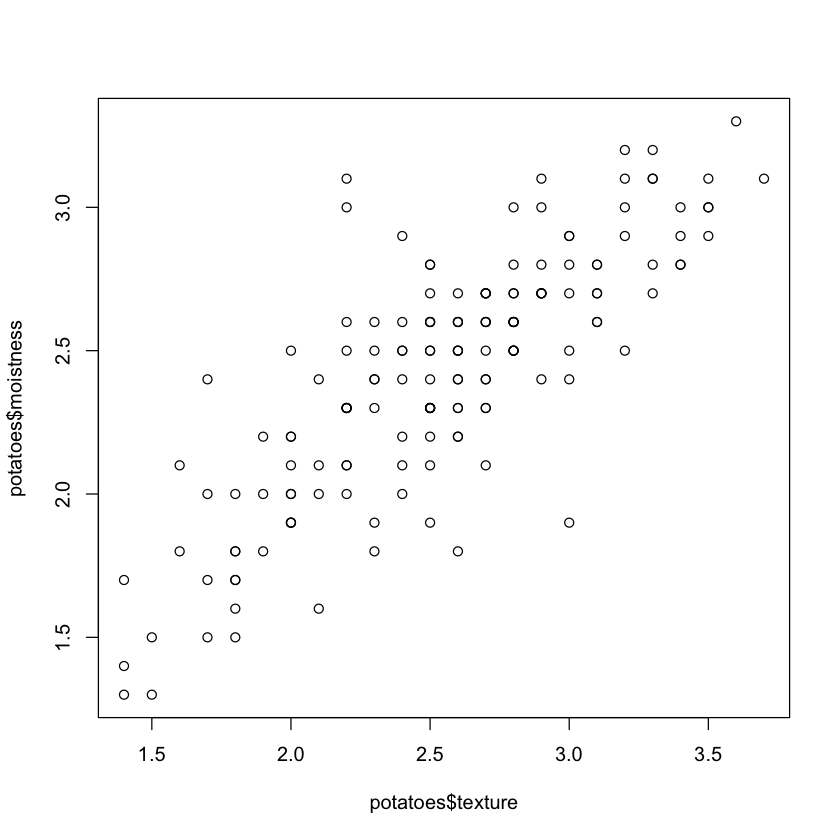

In [18]:
# fread is already loaded

# Import columns 6 and 8 of potatoes.csv: potatoes
potatoes <- fread("potatoes.csv", select = c(6,8))

# Plot texture (x) and moistness (y) of potatoes
plot(potatoes$texture, potatoes$moistness)

Before you can start importing from Excel, you should find out which sheets are available in the workbook. You can use the excel_sheets() function for this.

You will find the Excel file urbanpop.xlsx in your working directory (type dir() to see it). This dataset contains urban population metrics for practically all countries in the world throughout time (Source: Gapminder). It contains three sheets for three different time periods. In each sheet, the first row contains the column names.

In [19]:
# Load the readxl package
library(readxl)

# Print out the names of both spreadsheets
excel_sheets("urbanpop.xlsx")

[1] "1960-1966" "1967-1974" "1975-2011"

Now that you know the names of the sheets in the Excel file you want to import, it is time to import those sheets into R. You can do this with the read_excel() function. Have a look at this recipe:

data <- read_excel("data.xlsx", sheet = "my_sheet")
This call simply imports the sheet with the name "my_sheet" from the "data.xlsx" file. You can also pass a number to the sheet argument; this will cause read_excel() to import the sheet with the given sheet number. sheet = 1 will import the first sheet, sheet = 2 will import the second sheet, and so on.

In this exercise, you'll continue working with the urbanpop.xlsx file.



In [20]:
# The readxl package is already loaded

# Read the sheets, one by one
pop_1 <- read_excel("urbanpop.xlsx", sheet = 1)
pop_2 <- read_excel("urbanpop.xlsx", sheet = 2)
pop_3 <- read_excel("urbanpop.xlsx", sheet = 3)

# Put pop_1, pop_2 and pop_3 in a list: pop_list
pop_list = list(pop_1, pop_2, pop_3)

# Display the structure of pop_list
str(pop_list)

List of 3
 $ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	209 obs. of  8 variables:
  ..$ country: chr [1:209] "Afghanistan" "Albania" "Algeria" "American Samoa" ...
  ..$ 1960   : num [1:209] 769308 494443 3293999 NA NA ...
  ..$ 1961   : num [1:209] 814923 511803 3515148 13660 8724 ...
  ..$ 1962   : num [1:209] 858522 529439 3739963 14166 9700 ...
  ..$ 1963   : num [1:209] 903914 547377 3973289 14759 10748 ...
  ..$ 1964   : num [1:209] 951226 565572 4220987 15396 11866 ...
  ..$ 1965   : num [1:209] 1000582 583983 4488176 16045 13053 ...
  ..$ 1966   : num [1:209] 1058743 602512 4649105 16693 14217 ...
 $ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	209 obs. of  9 variables:
  ..$ country: chr [1:209] "Afghanistan" "Albania" "Algeria" "American Samoa" ...
  ..$ 1967   : num [1:209] 1119067 621180 4826104 17349 15440 ...
  ..$ 1968   : num [1:209] 1182159 639964 5017299 17996 16727 ...
  ..$ 1969   : num [1:209] 1248901 658853 5219332 18619 18088 ...
  ..$ 1970   : num [1:209] 1319849 

In [21]:
# The readxl package is already loaded

# Read all Excel sheets with lapply(): pop_list
pop_list <- lapply(excel_sheets("urbanpop.xlsx"), read_excel, path="urbanpop.xlsx")

# Display the structure of pop_list
str(pop_list)

List of 3
 $ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	209 obs. of  8 variables:
  ..$ country: chr [1:209] "Afghanistan" "Albania" "Algeria" "American Samoa" ...
  ..$ 1960   : num [1:209] 769308 494443 3293999 NA NA ...
  ..$ 1961   : num [1:209] 814923 511803 3515148 13660 8724 ...
  ..$ 1962   : num [1:209] 858522 529439 3739963 14166 9700 ...
  ..$ 1963   : num [1:209] 903914 547377 3973289 14759 10748 ...
  ..$ 1964   : num [1:209] 951226 565572 4220987 15396 11866 ...
  ..$ 1965   : num [1:209] 1000582 583983 4488176 16045 13053 ...
  ..$ 1966   : num [1:209] 1058743 602512 4649105 16693 14217 ...
 $ :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	209 obs. of  9 variables:
  ..$ country: chr [1:209] "Afghanistan" "Albania" "Algeria" "American Samoa" ...
  ..$ 1967   : num [1:209] 1119067 621180 4826104 17349 15440 ...
  ..$ 1968   : num [1:209] 1182159 639964 5017299 17996 16727 ...
  ..$ 1969   : num [1:209] 1248901 658853 5219332 18619 18088 ...
  ..$ 1970   : num [1:209] 1319849 

Apart from path and sheet, there are several other arguments you can specify in read_excel(). One of these arguments is called col_names.

By default it is TRUE, denoting whether the first row in the Excel sheets contains the column names. If this is not the case, you can set col_names to FALSE. In this case, R will choose column names for you. You can also choose to set col_names to a character vector with names for each column. It works exactly the same as in the readr package.

You'll be working with the urbanpop_nonames.xlsx file. It contains the same data as urbanpop.xlsx but has no column names in the first row of the excel sheets.



In [23]:
dir()


[1] "Cleaning Data in R - part 1.ipynb" "hotdogs.txt"                      
[3] "potatoes.csv"                      "potatoes.txt"                     
[5] "swimming_pools.csv"                "urbanpop.xls"                     
[7] "urbanpop.xlsx"                     "urbanpop_noname.xlsx"

In [24]:
# The readxl package is already loaded

# Import the the first Excel sheet of urbanpop_nonames.xlsx (R gives names): pop_a
pop_a <- read_excel("urbanpop_noname.xlsx", sheet = 1, col_names=FALSE)

# Import the the first Excel sheet of urbanpop_nonames.xlsx (specify col_names): pop_b
cols <- c("country", paste0("year_", 1960:1966))
pop_b <- read_excel("urbanpop_noname.xlsx", sheet = 1, col_names=cols)

# Print the summary of pop_a
summary(pop_a)

# Print the summary of pop_b
summary(pop_b)

     X__1                X__2                X__3                X__4          
 Length:209         Min.   :     3378   Min.   :     1028   Min.   :     1090  
 Class :character   1st Qu.:    88978   1st Qu.:    70644   1st Qu.:    74974  
 Mode  :character   Median :   580675   Median :   570159   Median :   593968  
                    Mean   :  4988124   Mean   :  4991613   Mean   :  5141592  
                    3rd Qu.:  3077228   3rd Qu.:  2807280   3rd Qu.:  2948396  
                    Max.   :126469700   Max.   :129268133   Max.   :131974143  
                    NA's   :11                                                 
      X__5                X__6                X__7          
 Min.   :     1154   Min.   :     1218   Min.   :     1281  
 1st Qu.:    81870   1st Qu.:    84953   1st Qu.:    88633  
 Median :   619331   Median :   645262   Median :   679109  
 Mean   :  5303711   Mean   :  5468966   Mean   :  5637394  
 3rd Qu.:  3148941   3rd Qu.:  3296444   3rd Qu.:  3317

   country            year_1960           year_1961           year_1962        
 Length:209         Min.   :     3378   Min.   :     1028   Min.   :     1090  
 Class :character   1st Qu.:    88978   1st Qu.:    70644   1st Qu.:    74974  
 Mode  :character   Median :   580675   Median :   570159   Median :   593968  
                    Mean   :  4988124   Mean   :  4991613   Mean   :  5141592  
                    3rd Qu.:  3077228   3rd Qu.:  2807280   3rd Qu.:  2948396  
                    Max.   :126469700   Max.   :129268133   Max.   :131974143  
                    NA's   :11                                                 
   year_1963           year_1964           year_1965        
 Min.   :     1154   Min.   :     1218   Min.   :     1281  
 1st Qu.:    81870   1st Qu.:    84953   1st Qu.:    88633  
 Median :   619331   Median :   645262   Median :   679109  
 Mean   :  5303711   Mean   :  5468966   Mean   :  5637394  
 3rd Qu.:  3148941   3rd Qu.:  3296444   3rd Qu.:  3317

Another argument that can be very useful when reading in Excel files that are less tidy, is skip. With skip, you can tell R to ignore a specified number of rows inside the Excel sheets you're trying to pull data from. Have a look at this example:

read_excel("data.xlsx", skip = 15)
In this case, the first 15 rows in the first sheet of "data.xlsx" are ignored.

If the first row of this sheet contained the column names, this information will also be ignored by readxl. Make sure to set col_names to FALSE or manually specify column names in this case!

The file urbanpop.xlsx is available in your directory; it has column names in the first rows.

In [25]:
# The readxl package is already loaded

# Import the second sheet of urbanpop.xlsx, skipping the first 21 rows: urbanpop_sel
urbanpop_sel <- read_excel("urbanpop.xlsx",sheet=2, col_names=FALSE, skip=21)

# Print out the first observation from urbanpop_sel
urbanpop_sel[1,]



X__1,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9
Benin,382022.1,411859.5,443013.1,475611.4,515819.5,557937.6,602093.2,648409.7


In this part of the chapter you'll learn how to import .xls files using the gdata package. Similar to the readxl package, you can import single Excel sheets from Excel sheets to start your analysis in R.

You'll be working with the urbanpop.xls dataset, the .xls version of the Excel file you've been working with before. It's available in your current working directory.

In [29]:
install.packages("gdata")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  internet routines cannot be loaded”Warning message:
“package ‘gdata’ is not available (for R version 3.4.1)”

In [28]:
# Load the gdata package
library("gdata")

# Import the second sheet of urbanpop.xls: urban_pop
urban_pop <- read.xls("urbanpop.xls", sheet = "1967-1974")

# Print the first 11 observations using head()
head(urban_pop, n=11)

ERROR: Error in library("gdata"): there is no package called ‘gdata’


Remember how read.xls() actually works? It basically comes down to two steps: converting the Excel file to a .csv file using a Perl script, and then reading that .csv file with the read.csv() function that is loaded by default in R, through the utils package.

This means that all the options that you can specify in read.csv(), can also be specified in read.xls().

The urbanpop.xls dataset is already available in your workspace. It's still comprised of three sheets, and has column names in the first row of each sheet.)

In [30]:
# The gdata package is alreaded loaded

# Column names for urban_pop
columns <- c("country", paste0("year_", 1967:1974))

# Finish the read.xls call
urban_pop <- read.xls("urbanpop.xls", sheet = 2,
                      skip = 50, header = FALSE, stringsAsFactors = FALSE,
                      col.names = columns)

# Print first 10 observation of urban_pop
head(urban_pop, n=10)

ERROR: Error in read.xls("urbanpop.xls", sheet = 2, skip = 50, header = FALSE, : could not find function "read.xls"


Now that you can read in Excel data, let's try to clean and merge it. You already used the cbind() function some exercises ago. Let's take it one step further now.

The urbanpop.xls dataset is available in your working directory. The file still contains three sheets, and has column names in the first row of each sheet.

In [31]:
# Add code to import data from all three sheets in urbanpop.xls
path <- "urbanpop.xls"
urban_sheet1 <- read.xls(path, sheet = 1, stringsAsFactors = FALSE)
urban_sheet2 <- read.xls(path, sheet = 2, stringsAsFactors = FALSE)
urban_sheet3 <- read.xls(path, sheet = 3, stringsAsFactors = FALSE)

# Extend the cbind() call to include urban_sheet3: urban
urban <- cbind(urban_sheet1, urban_sheet2[-1], urban_sheet3[-1])

# Remove all rows with NAs from urban: urban_clean
urban_clean <- na.omit(urban)

# Print out a summary of urban_clean
summary(urban_clean)

ERROR: Error in read.xls(path, sheet = 1, stringsAsFactors = FALSE): could not find function "read.xls"


When working with XLConnect, the first step will be to load a workbook in your R session with loadWorkbook(); this function will build a "bridge" between your Excel file and your R session.

In this and the following exercises, you will continue to work with urbanpop.xlsx, containing urban population data throughout time. The Excel file is available in your current working directory.

In [33]:
install.packages("XLConnect")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  internet routines cannot be loaded”Warning message:
“package ‘XLConnect’ is not available (for R version 3.4.1)”

In [34]:
# urbanpop.xlsx is available in your working directory

# Load the XLConnect package
library("XLConnect")

# Build connection to urbanpop.xlsx: my_book
my_book <- loadWorkbook("urbanpop.xlsx")

# Print out the class of my_book
class(my_book)

ERROR: Error in library("XLConnect"): there is no package called ‘XLConnect’


Just as readxl and gdata, you can use XLConnect to import data from Excel file into R.

To list the sheets in an Excel file, use getSheets(). To actually import data from a sheet, you can use readWorksheet(). Both functions require an XLConnect workbook object as the first argument.

You'll again be working with urbanpop.xlsx. The my_book object that links to this Excel file has already been created.

In [35]:
# XLConnect is already available

# Build connection to urbanpop.xlsx
my_book <- loadWorkbook("urbanpop.xlsx")

# List the sheets in my_book
getSheets(my_book)

# Import the second sheet in my_book
readWorksheet(my_book, sheet=2)


ERROR: Error in loadWorkbook("urbanpop.xlsx"): could not find function "loadWorkbook"


o get a clear overview about urbanpop.xlsx without having to open up the Excel file, you can execute the following code:

my_book <- loadWorkbook("urbanpop.xlsx")
sheets <- getSheets(my_book)
all <- lapply(sheets, readWorksheet, object = my_book)
str(all)
Suppose we're only interested in urban population data of the years 1968, 1969 and 1970. The data for these years is in the columns 3, 4, and 5 of the second sheet. Only selecting these columns will leave us in the dark about the actual countries the figures belong to,

In [36]:
# XLConnect is already available

# Build connection to urbanpop.xlsx
my_book <- loadWorkbook("urbanpop.xlsx")

# Import columns 3, 4, and 5 from second sheet in my_book: urbanpop_sel
urbanpop_sel <- readWorksheet(my_book, sheet = 2, startCol=3, endCol=5)

# Import first column from second sheet in my_book: countries
countries <- readWorksheet(my_book, sheet =2,  startCol=1, endCol=1)

# cbind() urbanpop_sel and countries together: selection
selection <- cbind(countries, urbanpop_sel)

ERROR: Error in loadWorkbook("urbanpop.xlsx"): could not find function "loadWorkbook"


Where readxl and gdata were only able to import Excel data, XLConnect's approach of providing an actual interface to an Excel file makes it able to edit your Excel files from inside R. In this exercise, you'll create a new sheet. In the next exercise, you'll populate the sheet with data, and save the results in a new Excel file.

You'll continue to work with urbanpop.xlsx. The my_book object that links to this Excel file is already available.

In [37]:
# XLConnect is already available

# Build connection to urbanpop.xlsx
my_book <- loadWorkbook("urbanpop.xlsx")

# Add a worksheet to my_book, named "data_summary"
createSheet(my_book, name="data_summary")

# Use getSheets() on my_book
getSheets(my_book)

ERROR: Error in loadWorkbook("urbanpop.xlsx"): could not find function "loadWorkbook"


The first step of creating a sheet is done; let's populate it with some data now! summ, a data frame with some summary statistics on the two Excel sheets is already coded so you can take it from there.

In [38]:
# XLConnect is already available

# Build connection to urbanpop.xlsx
my_book <- loadWorkbook("urbanpop.xlsx")

# Add a worksheet to my_book, named "data_summary"
createSheet(my_book, "data_summary")

# Create data frame: summ
sheets <- getSheets(my_book)[1:3]
dims <- sapply(sheets, function(x) dim(readWorksheet(my_book, sheet = x)), USE.NAMES = FALSE)
summ <- data.frame(sheets = sheets,
                   nrows = dims[1, ],
                   ncols = dims[2, ])

# Add data in summ to "data_summary" sheet
writeWorksheet(my_book, summ, sheet = "data_summary")

# Save workbook as summary.xlsx
saveWorkbook(my_book, file="summary.xlsx")

ERROR: Error in loadWorkbook("urbanpop.xlsx"): could not find function "loadWorkbook"


Come to think of it, "data_summary" is not an ideal name. As the summary of these excel sheets is always data-related, you simply want to name the sheet "summary".

The workspace already contains a workbook, my_book, that refers to an Excel file with 4 sheets: the three data sheets, and the "data_summary" sheet.

In [39]:
# my_book is available

# Rename "data_summary" sheet to "summary"
renameSheet(my_book, sheet=4, "summary")

# Print out sheets of my_book
getSheets(my_book)

# Save workbook to "renamed.xlsx"
saveWorkbook(my_book, file="renamed.xlsx")

ERROR: Error in renameSheet(my_book, sheet = 4, "summary"): could not find function "renameSheet"


After presenting the new Excel sheet to your peers, it appears not everybody is a big fan. Why summarize sheets and store the info in Excel if all the information is implicitly available? To hell with it, just remove the entire fourth sheet!

In [40]:
# Load the XLConnect package
library("XLConnect")

# Build connection to renamed.xlsx: my_book
my_book <- loadWorkbook("renamed.xlsx")

# Remove the fourth sheet
removeSheet(my_book, sheet="summary")

# Save workbook to "clean.xlsx"
saveWorkbook(my_book, file="clean.xlsx")

ERROR: Error in library("XLConnect"): there is no package called ‘XLConnect’
